# Project: EDA of Football league data

**Data:** The dataset contains football league data of European Premier League from 2012-16.

**Variables:**

     Field name Description:

     HomeTeam-Name of team playing in home ground
     AwayTeam-Name of team playing in away ground
     FTHG-Home team goals at the end of match
     FTAG-Away team goals at the end of match
     FTR-Match results (h:home team win, a:away team win, d:draw)
     Referee-Name of referee
     HST-Home team shots on target
     AST-Away team shots on target
     HF-Home team fouls
     AF-Away team fouls
     HC-Home team corners
     AC-Away team corners
     HY-Home team yellow cards
     AY-Away team yellow cards
     HR-Home team red cards
     AR-Away team red cards
     
**Exploration ideas:**
 
     Summary Stat: Matches, Team, Referees, %Home Win, Away Win
     Relegation Analysis
     Best/Worst Performing teams
     Playing Style: Foul, Shots


## Importing Packages

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import datetime
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [50]:
#importing all the files yearwise
df1= pd.read_csv('fdata12.csv')
df2= pd.read_csv('fdata13.csv')
df3= pd.read_csv('fdata14.csv')
df4= pd.read_csv('fdata15.csv')

In [51]:
#Adding the year column from the date column
df1['Year']='2012-2013'
df2['Year']='2013-2014'
df3['Year']='2014-2015'
df4['Year']='2015-2016'

In [52]:
#Concatinating all the dataframes into a single dataframe
raw_league_df=pd.concat([df1,df2,df3,df4],axis=0,ignore_index=True)

In [53]:
raw_league_df

AC    AF   AR    AS  AST   AY     AwayTeam  B365A  B365D  B365H  ...  \
0      0.0   8.0  0.0   3.0  2.0  0.0   Sunderland   8.50   4.50   1.40  ...   
1      3.0  11.0  0.0   4.0  2.0  0.0      Norwich   4.50   3.60   1.80  ...   
2      5.0   8.0  0.0  12.0  6.0  2.0    Tottenham   2.75   3.40   2.50  ...   
3      3.0  14.0  0.0  12.0  8.0  2.0      Swansea   3.80   3.40   2.00  ...   
4      3.0  14.0  1.0   6.0  3.0  4.0        Stoke   3.10   3.25   2.38  ...   
...    ...   ...  ...   ...  ...  ...          ...    ...    ...    ...  ...   
1516  10.0  12.0  0.0  20.0  7.0  1.0     West Ham   2.15   3.60   3.50  ...   
1517   4.0  19.0  0.0  18.0  5.0  3.0     Man City   1.53   4.75   6.00  ...   
1518   4.0  10.0  0.0   6.0  4.0  0.0   Sunderland   3.70   3.75   2.05  ...   
1519   5.0  14.0  0.0   7.0  3.0  1.0    Liverpool   3.00   3.60   2.40  ...   
1520   1.0   8.0  0.0   7.0  0.0  0.0  Bournemouth   5.25   4.20   1.67  ...   

      SJA  SJD   SJH   VCA   VCD   VCH   WHA   WHD   WHH       Year  
0     9.5  4.5  1.36  8.50  4.75  1.44  8.00  4.00  1.44  2012-2013  
1     4.5  3.6  1.80  4.75  3.75  1.83  4.50  3.30  1.85  2012-2013  
2     2.8  3.4  2.50  2.75  3.40  2.62  2.80  3.00  2.70  2012-2013  
3     3.6  3.3  2.10  4.00  3.50  2.00  3.80  3.30  2.00  2012-2013  
4     3.0  3.2  2.40  3.25  3.30  2.40  2.90  3.30  2.40  2012-2013  
...   ...  ...   ...   ...   ...   ...   ...   ...   ...        ...  
1516  NaN  NaN   NaN  2.10  3.80  3.50  2.20  3.10  3.50  2015-2016  
1517  NaN  NaN   NaN  1.53  4.75  5.20  1.53  4.33  5.50  2015-2016  
1518  NaN  NaN   NaN  3.70  3.75  2.05  3.60  3.75  1.95  2015-2016  
1519  NaN  NaN   NaN  3.00  3.60  2.38  3.10  3.10  2.40  2015-2016  
1520  NaN  NaN   NaN  5.20  4.10  1.67  4.75  4.00  1.67  2015-2016  

[1521 rows x 75 columns]

## Data Wrangling

In [54]:
#Dimensions of the Dataframe

raw_league_df.shape

(1521, 75)

In [55]:
#Selecting the required columns as mentioned in the project description for analysis

league_df=raw_league_df[['Year','HomeTeam','AwayTeam','FTHG','FTAG','FTR','Referee','HST','AST','HS','AS','HC','AC','HF','AF','HY','AY','HR','AR']]
league_df

Year    HomeTeam     AwayTeam  FTHG  FTAG FTR     Referee   HST  \
0     2012-2013     Arsenal   Sunderland   0.0   0.0   D       C Foy   4.0   
1     2012-2013      Fulham      Norwich   5.0   0.0   H    M Oliver   9.0   
2     2012-2013   Newcastle    Tottenham   2.0   1.0   H  M Atkinson   4.0   
3     2012-2013         QPR      Swansea   0.0   5.0   A   L Probert  11.0   
4     2012-2013     Reading        Stoke   1.0   1.0   D    K Friend   3.0   
...         ...         ...          ...   ...   ...  ..         ...   ...   
1516  2015-2016       Stoke     West Ham   2.0   1.0   H     M Jones   4.0   
1517  2015-2016     Swansea     Man City   1.0   1.0   D      M Dean   1.0   
1518  2015-2016     Watford   Sunderland   2.0   2.0   D    K Friend   6.0   
1519  2015-2016   West Brom    Liverpool   1.0   1.0   D    R Madley   1.0   
1520  2015-2016  Man United  Bournemouth   3.0   1.0   H      J Moss   5.0   

      AST    HS    AS   HC    AC    HF    AF   HY   AY   HR   AR  
0     2.0  14.0   3.0  7.0   0.0  12.0   8.0  0.0  0.0  0.0  0.0  
1     2.0  11.0   4.0  6.0   3.0  12.0  11.0  0.0  0.0  0.0  0.0  
2     6.0   6.0  12.0  3.0   5.0  12.0   8.0  2.0  2.0  0.0  0.0  
3     8.0  20.0  12.0  5.0   3.0  11.0  14.0  2.0  2.0  0.0  0.0  
4     3.0   9.0   6.0  4.0   3.0   9.0  14.0  2.0  4.0  0.0  1.0  
...   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...  
1516  7.0   7.0  20.0  4.0  10.0   8.0  12.0  3.0  1.0  0.0  0.0  
1517  5.0   4.0  18.0  4.0   4.0   4.0  19.0  1.0  3.0  0.0  0.0  
1518  4.0  21.0   6.0  7.0   4.0  11.0  10.0  1.0  0.0  0.0  0.0  
1519  3.0  13.0   7.0  7.0   5.0  11.0  14.0  3.0  1.0  0.0  0.0  
1520  0.0  12.0   7.0  7.0   1.0   9.0   8.0  1.0  0.0  0.0  0.0  

[1521 rows x 19 columns]

In [56]:
#column Datatypes

league_df.dtypes

Year         object
HomeTeam     object
AwayTeam     object
FTHG        float64
FTAG        float64
FTR          object
Referee      object
HST         float64
AST         float64
HS          float64
AS          float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

In [57]:
#checking any missing values
league_df[league_df.isna().any(axis=1)]

Year HomeTeam AwayTeam  FTHG  FTAG  FTR Referee  HST  AST  HS  AS  \
1140  2014-2015      NaN      NaN   NaN   NaN  NaN     NaN  NaN  NaN NaN NaN   

      HC  AC  HF  AF  HY  AY  HR  AR  
1140 NaN NaN NaN NaN NaN NaN NaN NaN

In [67]:
league_df.dropna(how='any',axis=0,inplace=True)

In [58]:
#performing statistical analysis
league_df.describe()

FTHG         FTAG          HST          AST           HS  \
count  1520.000000  1520.000000  1520.000000  1520.000000  1520.000000   
mean      1.524342     1.183553     5.586842     4.432237    14.503947   
std       1.303032     1.143948     3.231321     2.684780     5.519370   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000     0.000000     3.000000     3.000000    11.000000   
50%       1.000000     1.000000     5.000000     4.000000    14.000000   
75%       2.000000     2.000000     7.000000     6.000000    18.000000   
max       8.000000     6.000000    20.000000    20.000000    43.000000   

                AS           HC           AC           HF           AF  \
count  1520.000000  1520.000000  1520.000000  1520.000000  1520.000000   
mean     11.398026     6.098684     4.763158    10.511842    11.155921   
std       4.681438     3.142773     2.637994     3.322454     3.511108   
min       1.000000     0.000000     0.000000     2.000000     1.000000   
25%       8.000000     4.000000     3.000000     8.000000     9.000000   
50%      11.000000     6.000000     4.000000    11.000000    11.000000   
75%      14.000000     8.000000     6.000000    13.000000    14.000000   
max      30.000000    18.000000    17.000000    23.000000    24.000000   

                HY           AY           HR           AR  
count  1520.000000  1520.000000  1520.000000  1520.000000  
mean      1.465132     1.785526     0.061184     0.093421  
std       1.187535     1.280862     0.250490     0.304383  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     1.000000     0.000000     0.000000  
50%       1.000000     2.000000     0.000000     0.000000  
75%       2.000000     3.000000     0.000000     0.000000  
max       7.000000     9.000000     2.000000     2.000000

**Observation:** No Outliers are present since the mean and median are almost same

### Pandas Profiling 

In [61]:
report=pandas_profiling.ProfileReport(league_df)
report.to_file('f_pandasprofiling.html')

# Exploratory Data Analysis 

## 1.Summary Stat: Matches, Team, Referees, %Home Win, Away Win 

In [13]:
#creating match winner column derived from FTR column
league_df['Winner']='Draw'
league_df['Winner'][league_df['FTR']=='H']=league_df['HomeTeam']
league_df['Winner'][league_df['FTR']=='A']=league_df['AwayTeam']
league_df

Year    HomeTeam     AwayTeam  FTHG  FTAG FTR     Referee  \
Date                                                                       
18/08/12  2012-2013     Arsenal   Sunderland   0.0   0.0   D       C Foy   
18/08/12  2012-2013      Fulham      Norwich   5.0   0.0   H    M Oliver   
18/08/12  2012-2013   Newcastle    Tottenham   2.0   1.0   H  M Atkinson   
18/08/12  2012-2013         QPR      Swansea   0.0   5.0   A   L Probert   
18/08/12  2012-2013     Reading        Stoke   1.0   1.0   D    K Friend   
...             ...         ...          ...   ...   ...  ..         ...   
15/05/16  2015-2016       Stoke     West Ham   2.0   1.0   H     M Jones   
15/05/16  2015-2016     Swansea     Man City   1.0   1.0   D      M Dean   
15/05/16  2015-2016     Watford   Sunderland   2.0   2.0   D    K Friend   
15/05/16  2015-2016   West Brom    Liverpool   1.0   1.0   D    R Madley   
17/05/16  2015-2016  Man United  Bournemouth   3.0   1.0   H      J Moss   

           HST  AST    HS    AS   HC    AC    HF    AF   HY   AY   HR   AR  \
Date                                                                         
18/08/12   4.0  2.0  14.0   3.0  7.0   0.0  12.0   8.0  0.0  0.0  0.0  0.0   
18/08/12   9.0  2.0  11.0   4.0  6.0   3.0  12.0  11.0  0.0  0.0  0.0  0.0   
18/08/12   4.0  6.0   6.0  12.0  3.0   5.0  12.0   8.0  2.0  2.0  0.0  0.0   
18/08/12  11.0  8.0  20.0  12.0  5.0   3.0  11.0  14.0  2.0  2.0  0.0  0.0   
18/08/12   3.0  3.0   9.0   6.0  4.0   3.0   9.0  14.0  2.0  4.0  0.0  1.0   
...        ...  ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...   
15/05/16   4.0  7.0   7.0  20.0  4.0  10.0   8.0  12.0  3.0  1.0  0.0  0.0   
15/05/16   1.0  5.0   4.0  18.0  4.0   4.0   4.0  19.0  1.0  3.0  0.0  0.0   
15/05/16   6.0  4.0  21.0   6.0  7.0   4.0  11.0  10.0  1.0  0.0  0.0  0.0   
15/05/16   1.0  3.0  13.0   7.0  7.0   5.0  11.0  14.0  3.0  1.0  0.0  0.0   
17/05/16   5.0  0.0  12.0   7.0  7.0   1.0   9.0   8.0  1.0  0.0  0.0  0.0   

              Winner  
Date                  
18/08/12        Draw  
18/08/12      Fulham  
18/08/12   Newcastle  
18/08/12     Swansea  
18/08/12        Draw  
...              ...  
15/05/16       Stoke  
15/05/16        Draw  
15/05/16        Draw  
15/05/16        Draw  
17/05/16  Man United  

[1520 rows x 20 columns]

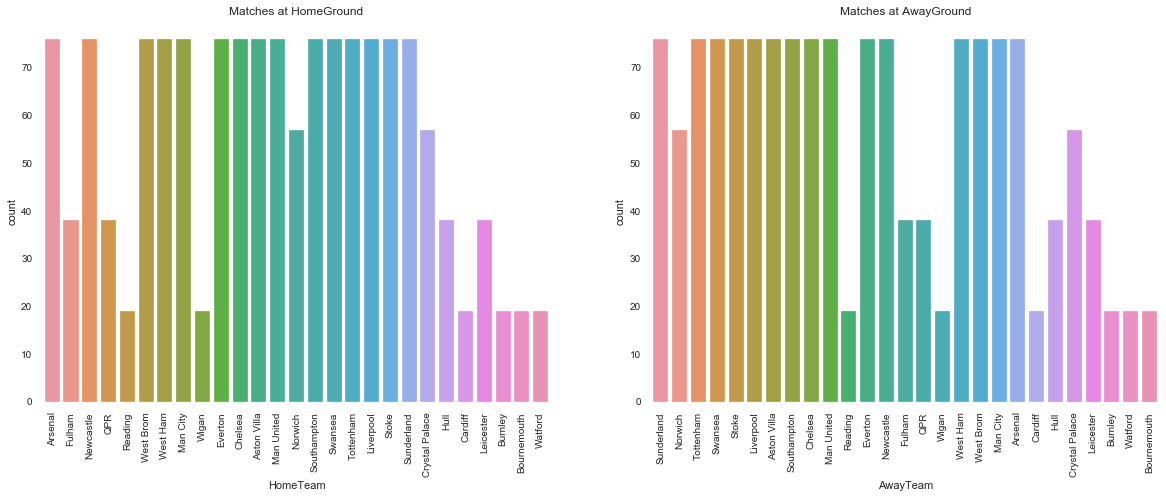

In [14]:
#Number of matches played by each team at home ground and away ground

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Matches at HomeGround')
sns.countplot(x='HomeTeam',data=league_df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Matches at AwayGround')
sns.countplot(x='AwayTeam',data=league_df)
plt.xticks(rotation=90)

plt.show()

**Observation:** Equal Number of matches are played by each team at both grounds

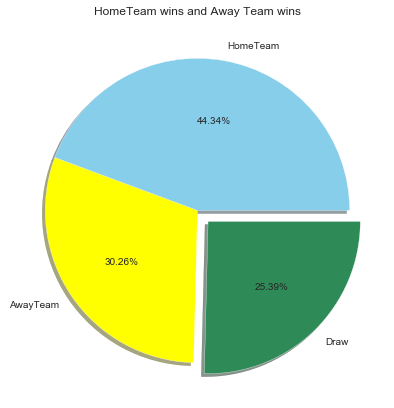

In [15]:
#Winning percentage by home team and away team
winner_=league_df['FTR'].value_counts()

plt.figure(figsize=(10,7))
plt.title('HomeTeam wins and Away Team wins')
plt.pie(winner_,autopct='%.2f%%',labels=['HomeTeam','AwayTeam','Draw'],rotatelabels=False,shadow=True,explode=[0,0,0.1],colors=['skyblue','yellow','seagreen'])
plt.show()

**Observation:**
         
         Home Team Wins are more than Away Team wins

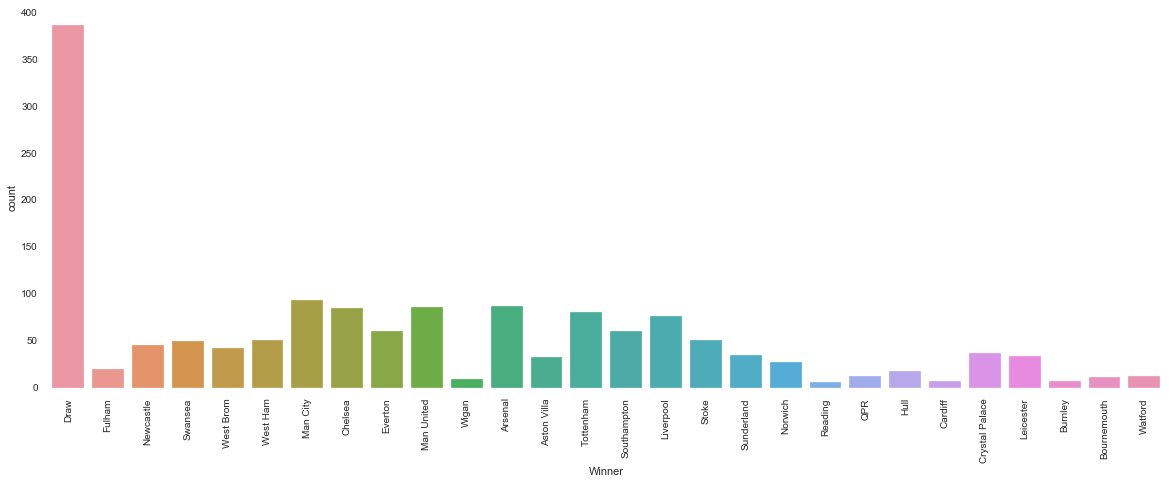

In [16]:
#match Victories by each team
plt.figure(figsize=(20,7))
sns.countplot(x='Winner',data=league_df)
plt.xticks(rotation=90)
plt.show()

**Observation:** Matches result in draw for maximun number of times.

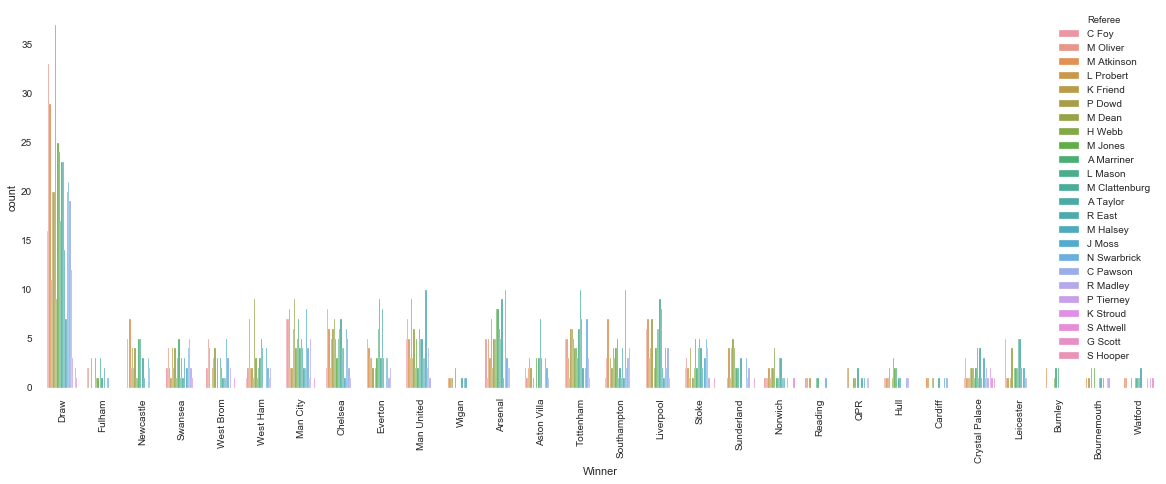

In [17]:
# Team victory and Referee analysis
plt.figure(figsize=(20,7))
sns.countplot(x='Winner',data=league_df,hue='Referee')
plt.xticks(rotation=90)
plt.show()

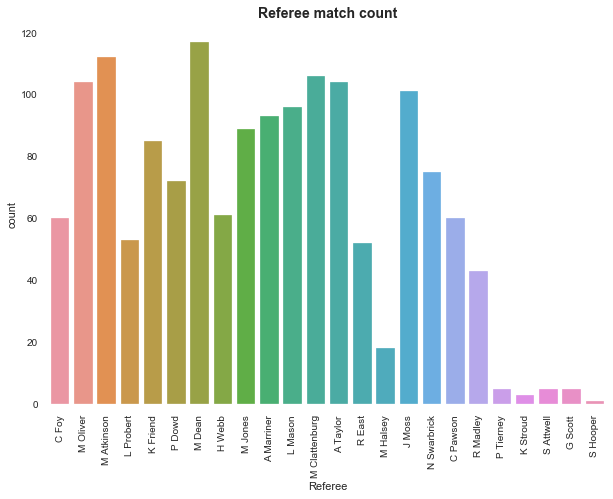

In [18]:
#Referee Match Count

plt.figure(figsize=(10,7))
plt.title('Referee match count',fontsize=14,fontweight='bold')
sns.countplot(x='Referee',data=league_df,orient='vertical')
plt.xticks(rotation=90)
plt.show()

**Observation:** M Dean,M Atkinson,M Clattenburn were the referees for maximum number of matches

In [19]:
#total goals by hometeam and awayteam
total_hometeam_goals=league_df.groupby('Year')['FTHG'].sum()
total_awayteam_goals=league_df.groupby('Year')['FTAG'].sum()

<Figure size 1080x648 with 0 Axes>

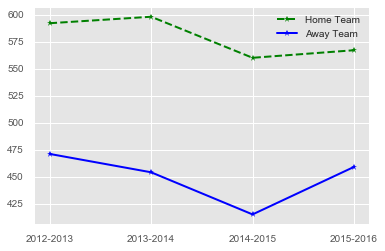

In [20]:
#plotting total hometeam goals and total away team goals

from matplotlib import style
style.use('ggplot')
Year=['2012-2013','2013-2014','2014-2015','2015-2016']
plt.figure(figsize=(15,9))

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


ax.plot(Year,total_hometeam_goals,'g*--',linewidth=2,label='Home Team')
ax.plot(Year,total_awayteam_goals,'b*-',linewidth=2,label='Away Team')
ax.legend()
plt.show()


**observation:** 
             
             *Less number of goals are observed during 2014-2015
             *Hometeam goals are more compared to AwayTeam goals

## 2. Best and Worst performing teams year wise and over all

#### 2.1 Home Ground Analysis

In [21]:
#Yearwise Performance Analysis
f_12_13= league_df.loc[league_df['Year']=='2012-2013']
f_13_14= league_df.loc[league_df['Year']=='2013-2014']
f_14_15= league_df.loc[league_df['Year']=='2014-2015']
f_15_16= league_df.loc[league_df['Year']=='2015-2016']

In [64]:
#total goals by each team yearwise on home ground
h_goals_12_13=f_12_13.groupby('HomeTeam')['FTHG'].sum()
h_goals_13_14=f_13_14.groupby('HomeTeam')['FTHG'].sum()
h_goals_14_15=f_14_15.groupby('HomeTeam')['FTHG'].sum()
h_goals_15_16=f_15_16.groupby('HomeTeam')['FTHG'].sum()
h_goals_15_16

HomeTeam
Arsenal           31.0
Aston Villa       14.0
Bournemouth       23.0
Chelsea           32.0
Crystal Palace    19.0
Everton           35.0
Leicester         35.0
Liverpool         33.0
Man City          47.0
Man United        27.0
Newcastle         32.0
Norwich           26.0
Southampton       39.0
Stoke             22.0
Sunderland        23.0
Swansea           20.0
Tottenham         35.0
Watford           20.0
West Brom         20.0
West Ham          34.0
Name: FTHG, dtype: float64

In [65]:
#list of hometeams present in the respective years
h_team_12_13=f_12_13['HomeTeam'].sort_values().unique()
h_team_13_14=f_13_14['HomeTeam'].sort_values().unique()
h_team_14_15=f_14_15['HomeTeam'].sort_values().unique()
h_team_15_16=f_15_16['HomeTeam'].sort_values().unique()
h_team_15_16

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Chelsea',
       'Crystal Palace', 'Everton', 'Leicester', 'Liverpool', 'Man City',
       'Man United', 'Newcastle', 'Norwich', 'Southampton', 'Stoke',
       'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom',
       'West Ham'], dtype=object)

In [24]:
#Team goals at Home Ground

from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(rows=2, cols=2,subplot_titles=("2012-2013", "2013-2014", "2014-2015", "2015-2016"))


fig.add_trace(go.Bar( y=h_goals_12_13, x=h_team_12_13),row=1, col=1)
fig.add_trace(go.Bar( y=h_goals_13_14, x=h_team_13_14),row=1, col=2)
fig.add_trace(go.Bar( y=h_goals_14_15, x=h_team_14_15),row=2, col=1)
fig.add_trace(go.Bar( y=h_goals_15_16, x=h_team_15_16),row=2, col=2)

fig.update_layout(height=1000, width=1000, title_text="Total Goals by teams on HOMEGROUND")
fig.show()

**Observation:** 

           *Man City and Liverpool has been playing consistently over the years.
           *Fullham's performance was bad and didnt qualify for the last two years
           

#### 2.2 Away Ground Analysis

In [25]:
#total goals by each team yearwise on away ground
a_goals_12_13=f_12_13.groupby('AwayTeam')['FTAG'].sum()
a_goals_13_14=f_13_14.groupby('AwayTeam')['FTAG'].sum()
a_goals_14_15=f_14_15.groupby('AwayTeam')['FTAG'].sum()
a_goals_15_16=f_15_16.groupby('AwayTeam')['FTAG'].sum()

In [26]:
#list of awayteams present in the respective years
a_team_12_13=f_12_13['AwayTeam'].sort_values().unique()
a_team_13_14=f_13_14['AwayTeam'].sort_values().unique()
a_team_14_15=f_14_15['AwayTeam'].sort_values().unique()
a_team_15_16=f_15_16['AwayTeam'].sort_values().unique()

In [27]:
#Team goals at Away Ground


fig = make_subplots(rows=2, cols=2,subplot_titles=("2012-2013", "2013-2014", "2014-2015", "2015-2016"))


fig.add_trace(go.Bar( y=a_goals_12_13, x=a_team_12_13),row=1, col=1)
fig.add_trace(go.Bar( y=a_goals_13_14, x=a_team_13_14),row=1, col=2)
fig.add_trace(go.Bar( y=a_goals_14_15, x=a_team_14_15),row=2, col=1)
fig.add_trace(go.Bar( y=a_goals_15_16, x=a_team_15_16),row=2, col=2)

fig.update_layout(height=1000, width=1000, title_text="Total Goals by teams on AwayGRound")
fig.show()

**observation:** 
              
              *Liverpool,Man United,Chelsea,Man city were consistant
              *Aston Villa performed same at both grounds

In [28]:
#Total home team goals from 2012-16

fig = px.bar(league_df, x='HomeTeam', y='FTHG',height=400,color='Year',title='Total Home Team goals trend from 2012-2016',orientation='v')
fig.show()

In [29]:
#total away team goals from 2012-16

fig=px.bar(league_df,x='AwayTeam',y='FTAG',height=400,color='Year',title='Total Away Team goals trend from 2012-2016')
fig.show()

**BEST PERFORMING TEAMS:**
    
    On HomeGround: Man City, Arsenal, Chelsea, Liverpool, Man United
    On AwayGround: Liverpool, Man City, Chelsea, Man United, Tottenham, Arsenal
        


## 3. Relegation analysis

In [30]:
#points allocation

points_home_league_df= league_df.groupby(['HomeTeam','Year','FTR']).size().unstack().reset_index()
points_home_league_df=points_home_league_df.fillna(0)

points_home_league_df['points@HomeGround']=points_home_league_df['H']*3 +points_home_league_df['D']*1

points_away_league_df= league_df.groupby(['AwayTeam','Year','FTR']).size().unstack().reset_index()
points_away_league_df['points@AwayGround']= points_away_league_df['A']*3 +points_away_league_df['D']*1

points_league_df= pd.concat([points_home_league_df,points_away_league_df.drop(columns=['Year'])],axis=1)
#points_league_df= points_league_df.drop(columns=['FTR','Year'],axis=1)
points_league_df['Total Points']= points_league_df['points@HomeGround'] + points_league_df['points@AwayGround']
points_league_df

FTR     HomeTeam       Year    A    D     H  points@HomeGround     AwayTeam  \
0        Arsenal  2012-2013  3.0  5.0  11.0               38.0      Arsenal   
1        Arsenal  2013-2014  1.0  5.0  13.0               44.0      Arsenal   
2        Arsenal  2014-2015  2.0  5.0  12.0               41.0      Arsenal   
3        Arsenal  2015-2016  3.0  4.0  12.0               40.0      Arsenal   
4    Aston Villa  2012-2013  9.0  5.0   5.0               20.0  Aston Villa   
..           ...        ...  ...  ...   ...                ...          ...   
75      West Ham  2012-2013  4.0  6.0   9.0               33.0     West Ham   
76      West Ham  2013-2014  9.0  3.0   7.0               24.0     West Ham   
77      West Ham  2014-2015  6.0  4.0   9.0               31.0     West Ham   
78      West Ham  2015-2016  3.0  7.0   9.0               34.0     West Ham   
79         Wigan  2012-2013  9.0  6.0   4.0               18.0        Wigan   

FTR   A  D   H  points@AwayGround  Total Points  
0    10  5   4                 35          73.0  
1    11  2   6                 35          79.0  
2    10  4   5                 34          75.0  
3     8  7   4                 31          71.0  
4     5  6   8                 21          41.0  
..   .. ..  ..                ...           ...  
75    3  4  12                 13          46.0  
76    4  4  11                 16          40.0  
77    3  7   9                 16          47.0  
78    7  7   5                 28          62.0  
79    5  3  11                 18          36.0  

[80 rows x 12 columns]

In [31]:
table=pd.pivot_table(points_league_df, values=['Total Points'], index=['Year', 'HomeTeam'])
table

FTR                    Total Points
Year      HomeTeam                 
2012-2013 Arsenal              73.0
          Aston Villa          41.0
          Chelsea              75.0
          Everton              63.0
          Fulham               43.0
...                             ...
2015-2016 Swansea              47.0
          Tottenham            70.0
          Watford              45.0
          West Brom            43.0
          West Ham             62.0

[80 rows x 1 columns]

In [66]:
#to get the champions of the league,we are sorting according to the points
y1=points_league_df.loc[points_league_df['Year']=='2012-2013']
y2=points_league_df.loc[points_league_df['Year']=='2013-2014']
y3=points_league_df.loc[points_league_df['Year']=='2014-2015']
y4=points_league_df.loc[points_league_df['Year']=='2015-2016']
y1=y1.sort_values('Total Points',ascending=False)
y2=y2.sort_values('Total Points',ascending=False)
y3=y3.sort_values('Total Points',ascending=False)
y4=y4.sort_values('Total Points',ascending=False)
y1

FTR     HomeTeam       Year    A    D     H  points@HomeGround     AwayTeam  \
36    Man United  2012-2013  3.0  0.0  16.0               48.0   Man United   
32      Man City  2012-2013  2.0  3.0  14.0               45.0     Man City   
11       Chelsea  2012-2013  2.0  5.0  12.0               41.0      Chelsea   
0        Arsenal  2012-2013  3.0  5.0  11.0               38.0      Arsenal   
66     Tottenham  2012-2013  3.0  5.0  11.0               38.0    Tottenham   
18       Everton  2012-2013  1.0  6.0  12.0               42.0      Everton   
28     Liverpool  2012-2013  4.0  6.0   9.0               33.0    Liverpool   
71     West Brom  2012-2013  6.0  4.0   9.0               31.0    West Brom   
75      West Ham  2012-2013  4.0  6.0   9.0               33.0     West Ham   
62       Swansea  2012-2013  5.0  8.0   6.0               26.0      Swansea   
44       Norwich  2012-2013  4.0  7.0   8.0               31.0      Norwich   
22        Fulham  2012-2013  9.0  3.0   7.0               24.0       Fulham   
54         Stoke  2012-2013  5.0  7.0   7.0               28.0        Stoke   
4    Aston Villa  2012-2013  9.0  5.0   5.0               20.0  Aston Villa   
50   Southampton  2012-2013  6.0  7.0   6.0               25.0  Southampton   
40     Newcastle  2012-2013  9.0  1.0   9.0               28.0    Newcastle   
58    Sunderland  2012-2013  6.0  8.0   5.0               23.0   Sunderland   
79         Wigan  2012-2013  9.0  6.0   4.0               18.0        Wigan   
49       Reading  2012-2013  7.0  8.0   4.0               20.0      Reading   
47           QPR  2012-2013  9.0  8.0   2.0               14.0          QPR   

FTR   A  D   H  points@AwayGround  Total Points  
36   12  5   2                 41          89.0  
32    9  6   4                 33          78.0  
11   10  4   5                 34          75.0  
0    10  5   4                 35          73.0  
66   10  4   5                 34          72.0  
18    4  9   6                 21          63.0  
28    7  7   5                 28          61.0  
71    5  3  11                 18          49.0  
75    3  4  12                 13          46.0  
62    5  5   9                 20          46.0  
44    2  7  10                 13          44.0  
22    4  7   8                 19          43.0  
54    2  8   9                 14          42.0  
4     5  6   8                 21          41.0  
50    3  7   9                 16          41.0  
40    2  7  10                 13          41.0  
58    4  4  11                 16          39.0  
79    5  3  11                 18          36.0  
49    2  2  15                  8          28.0  
47    2  5  12                 11          25.0

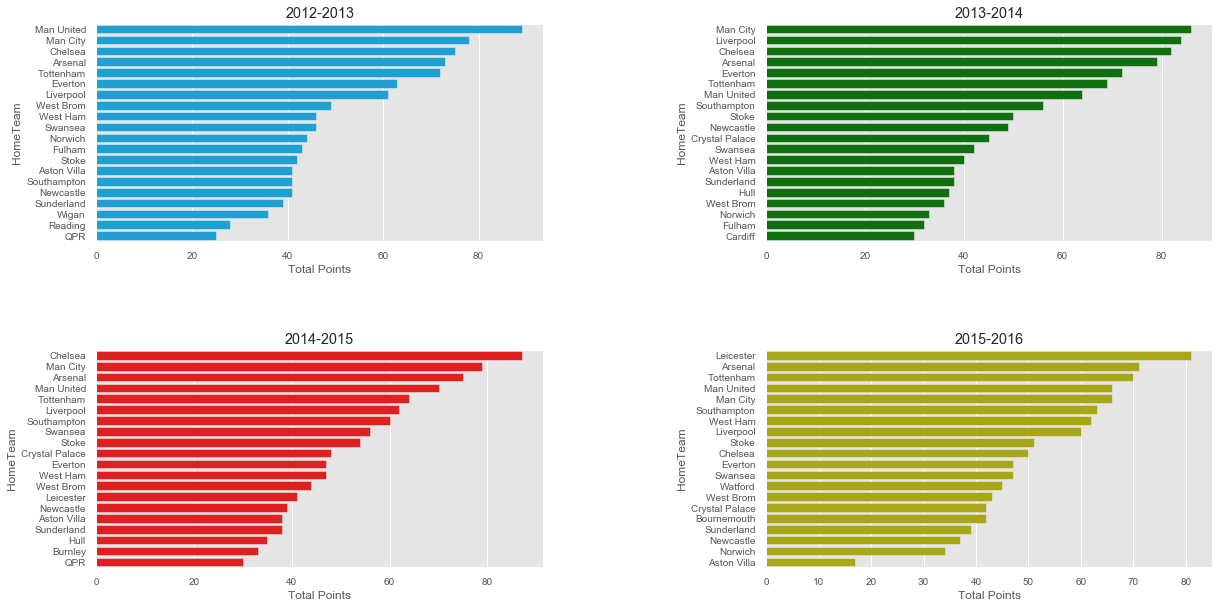

In [33]:
#plotting the team ranking yearwise

plt.figure(figsize=(20,10))
plt.subplots_adjust( wspace= 0.5,hspace=0.5)
plt.title('Relegation and Promotion Analysis')

plt.subplot(2,2,1)
plt.title('2012-2013')
sns.barplot(y='HomeTeam',x='Total Points',data=y1,color='#00aff0')

plt.subplot(2,2,2)
plt.title('2013-2014')
sns.barplot(y='HomeTeam',x='Total Points',data=y2,color='g')

plt.subplot(2,2,3)
plt.title('2014-2015')
sns.barplot(y='HomeTeam',x='Total Points',data=y3,color='r')

plt.subplot(2,2,4)
plt.title('2015-2016')
sns.barplot(y='HomeTeam',x='Total Points',data=y4,color='y')

plt.show()

**Observation:**
       
       Top 3 teams are promoted and the bottom 3 teams are relegated
    
           2012-2013: top 3    ->  Man United,Man City,Chelsea
                      bottom 3 ->  Wigan,Reading,QPR
           2013-2014: top3     ->  Man City,Liverpool,Chelsea
                      bottom 3 ->  Norwich,Fulham,Cardiff
           2014-2015: top3     ->  Chelsea,Man City,Arsenal
                      bottom 3 ->  Hull,Burnley,QPR
           2015-2016: top3     ->  Leicester,Arsenal,Tottenham
                      bottom3  ->  Newcastle,Norwich,Aston Villa

## 4. Playing style

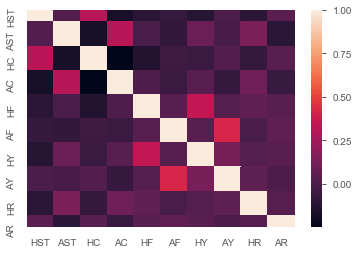

In [34]:
#finding correlation between the features

playing_style_columns= league_df[['HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']]
corr=playing_style_columns.corr()
sns.heatmap(corr)

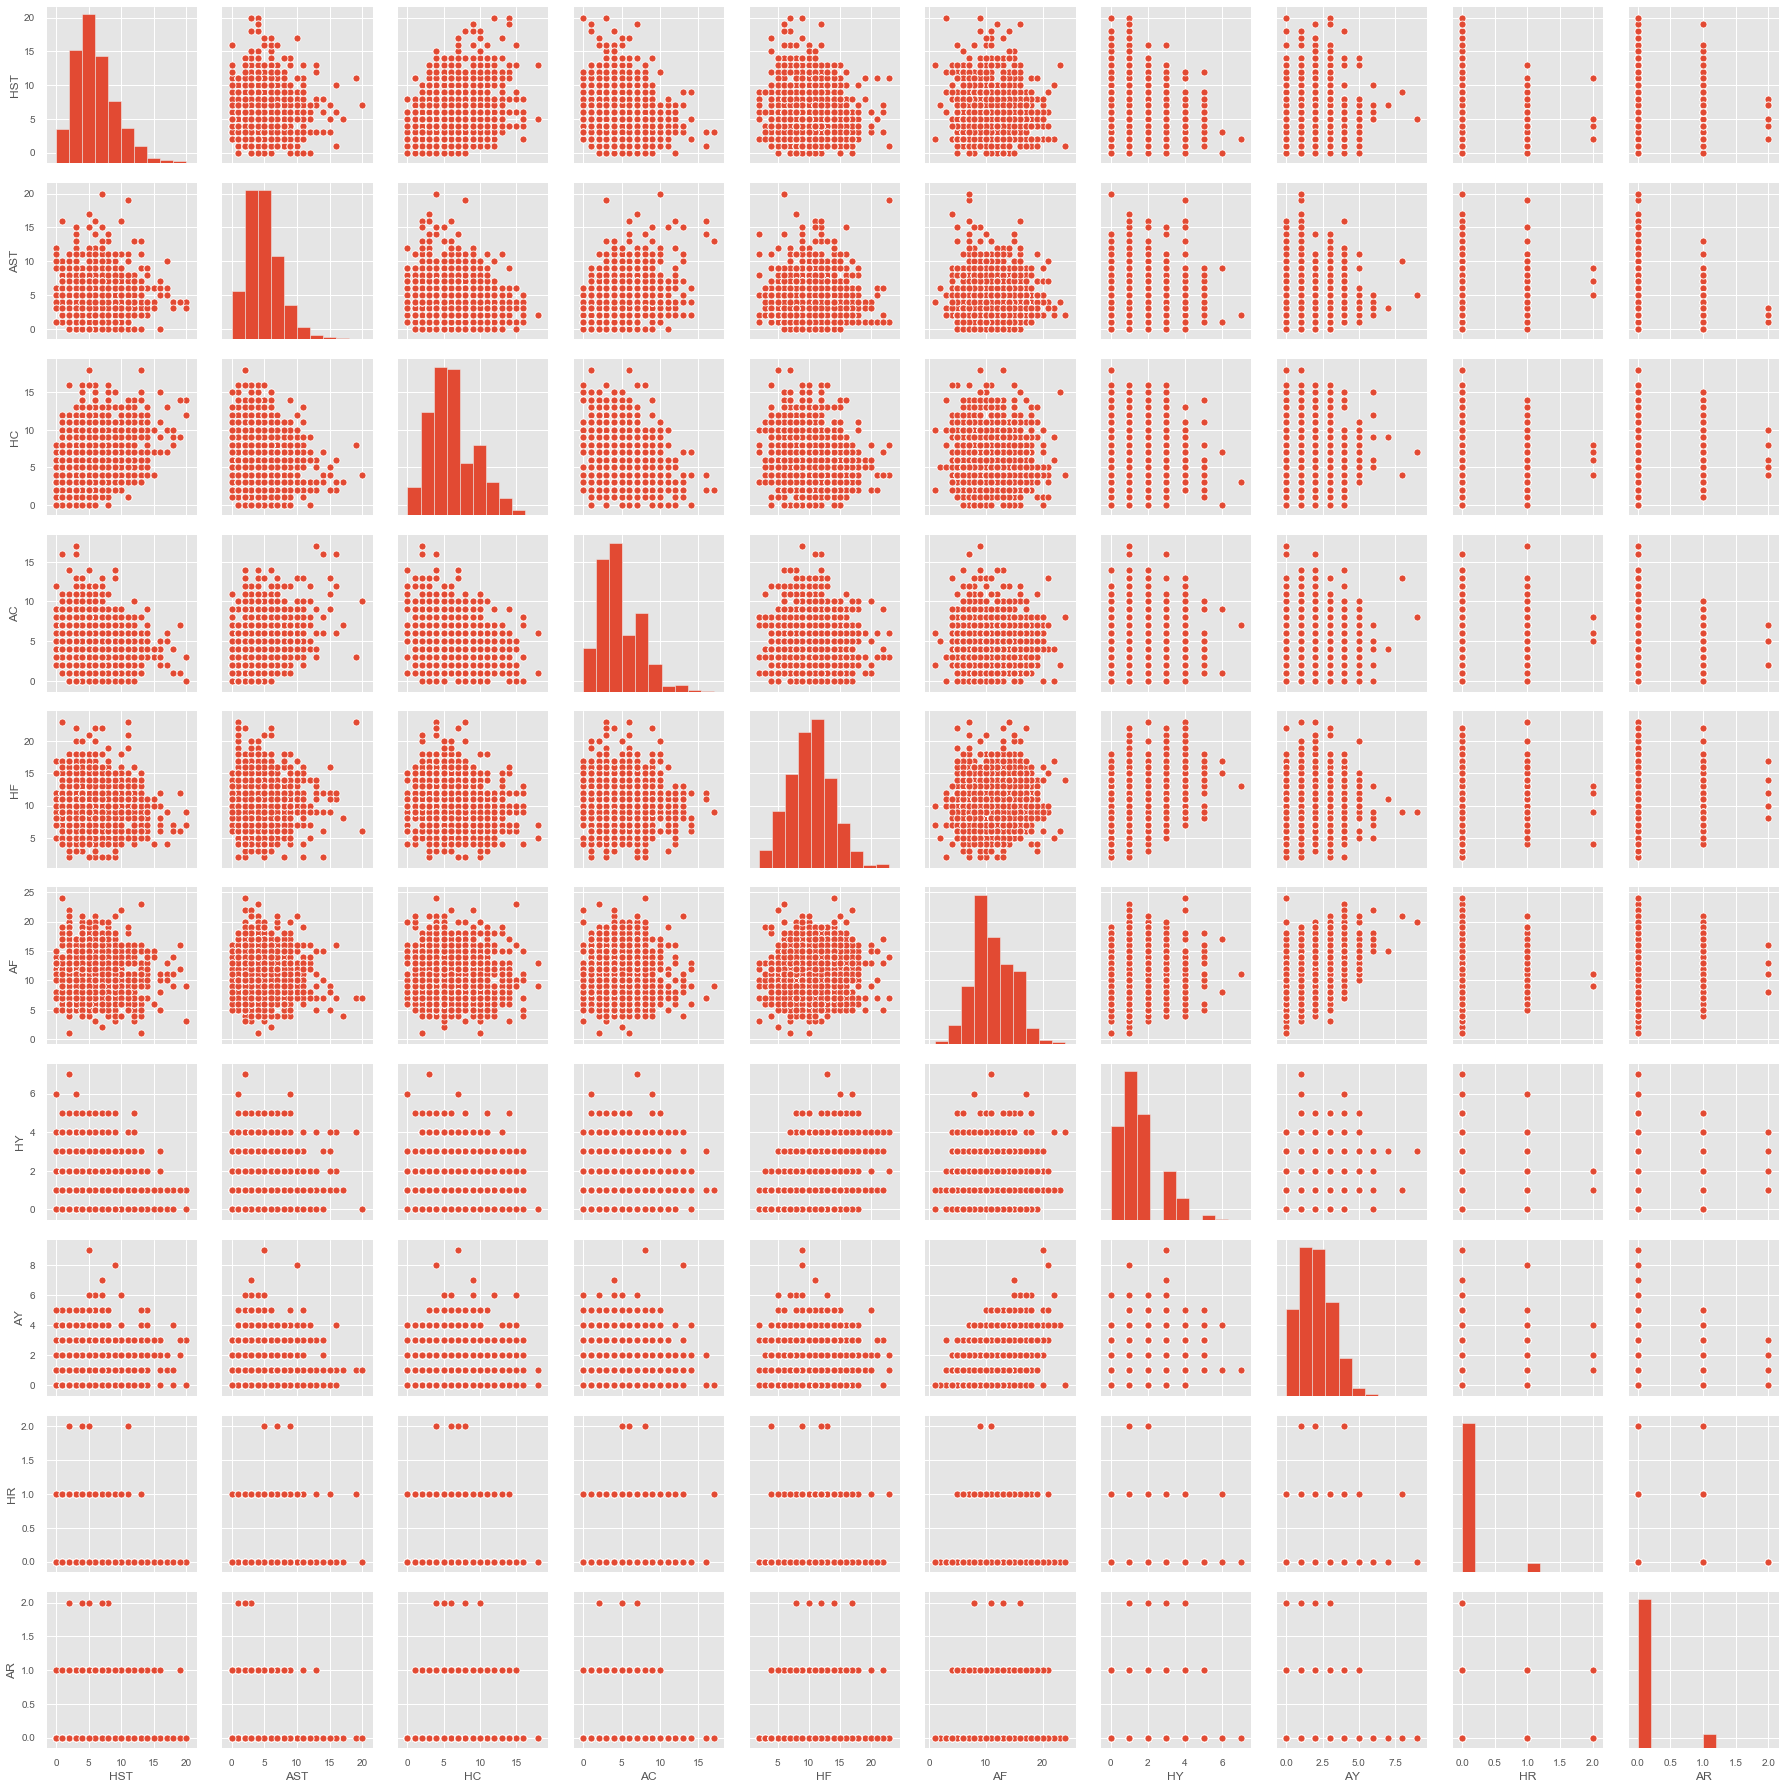

In [35]:
#pairplotting..
inputs= league_df[['HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']]
#print(inputs)
sns.pairplot(inputs)

**observation:**

    we see a correlation between HST,AST and HC,AC also between HY,AY and HF,AF

#### 4.1Home Shot Targets and Away Shot Targets

In [36]:
#HomeShotTargets vs AwayShotTargets

fig = go.Figure()
fig.add_trace(go.Bar(x=league_df['HomeTeam'],
                y=league_df['HST'],
                name='HST',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=league_df['HomeTeam'],
                y=league_df['AST'],
                name='AST',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Home Shot Targets vs Away Shot Targets',
    xaxis_tickfont_size=14,
    yaxis=dict(
    
        titlefont_size=16,
        tickfont_size=14
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
fig.show()


**Observation:** 
      
      Home Shot Targets are more than Away Shot Targets for all teams.

#### 4.2 Total shots and Total Corners

In [37]:
#calculating total shots and corners

names= league_df['HomeTeam'].unique()
shots_data= league_df.pivot_table(index='HomeTeam',values=['HST','AST','HC','AC'],aggfunc=sum)
shots_data['Total Shots']=shots_data['HST']+shots_data['AST']
shots_data['Total Corners']=shots_data['HC']+shots_data['AC']
shots_data

AC    AST     HC    HST  Total Shots  Total Corners
HomeTeam                                                              
Arsenal         299.0  276.0  563.0  550.0        826.0          862.0
Aston Villa     438.0  388.0  388.0  326.0        714.0          826.0
Bournemouth      77.0   75.0  129.0   83.0        158.0          206.0
Burnley          87.0   79.0   89.0   70.0        149.0          176.0
Cardiff         119.0  117.0  110.0   74.0        191.0          229.0
Chelsea         344.0  319.0  526.0  553.0        872.0          870.0
Crystal Palace  295.0  230.0  338.0  241.0        471.0          633.0
Everton         339.0  310.0  519.0  471.0        781.0          858.0
Fulham          208.0  252.0  220.0  236.0        488.0          428.0
Hull            182.0  145.0  187.0  151.0        296.0          369.0
Leicester       204.0  141.0  211.0  172.0        313.0          415.0
Liverpool       337.0  272.0  532.0  578.0        850.0          869.0
Man City        298.0  266.0  623.0  556.0        822.0          921.0
Man United      293.0  270.0  459.0  444.0        714.0          752.0
Newcastle       370.0  337.0  468.0  409.0        746.0          838.0
Norwich         282.0  266.0  320.0  269.0        535.0          602.0
QPR             241.0  239.0  184.0  223.0        462.0          425.0
Reading         106.0  144.0  104.0   85.0        229.0          210.0
Southampton     330.0  265.0  461.0  435.0        700.0          791.0
Stoke           378.0  332.0  390.0  309.0        641.0          768.0
Sunderland      392.0  403.0  421.0  330.0        733.0          813.0
Swansea         333.0  368.0  399.0  400.0        768.0          732.0
Tottenham       362.0  304.0  529.0  551.0        855.0          891.0
Watford          95.0   74.0   95.0   74.0        148.0          190.0
West Brom       354.0  339.0  425.0  357.0        696.0          779.0
West Ham        400.0  400.0  465.0  408.0        808.0          865.0
Wigan            77.0  126.0  115.0  137.0        263.0          192.0

In [38]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=names,
    y=shots_data['Total Shots'],
    name='total shot targets',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=names,
    y=shots_data['Total Corners'],
    name='Total corners',
    marker_color='lightsalmon'
))

fig.update_layout(title='Total Shot Targets and Total Corners',barmode='group', xaxis_tickangle=-45,)
fig.show()

**Observation:** Total corners are more than Shot targets

#### 4.3 Fouls , Yellow ,Red Card Analysis 

In [39]:
#fouls,yellow and red card visualisation

names= league_df['HomeTeam'].unique()
fouls_data= league_df.pivot_table(index='HomeTeam',values=['HY','HR','HF','AY','AR','AF'],aggfunc=sum)
fouls_data['Total Fouls']=fouls_data['HF']+fouls_data['AF']
fouls_data['Total Yellow cards']=fouls_data['HY']+fouls_data['AY']
fouls_data['Total Red cards']=fouls_data['HR']+fouls_data['AR']
fouls_data

AF    AR     AY     HF   HR     HY  Total Fouls  \
HomeTeam                                                             
Arsenal         868.0   7.0  140.0  725.0  4.0   88.0       1593.0   
Aston Villa     749.0   7.0  127.0  827.0  8.0  130.0       1576.0   
Bournemouth     219.0   1.0   24.0  175.0  0.0   25.0        394.0   
Burnley         203.0   0.0   34.0  212.0  0.0   33.0        415.0   
Cardiff         199.0   2.0   36.0  167.0  0.0   25.0        366.0   
Chelsea         949.0   8.0  169.0  810.0  6.0  104.0       1759.0   
Crystal Palace  688.0   7.0  100.0  685.0  3.0   81.0       1373.0   
Everton         908.0   4.0  155.0  705.0  3.0  106.0       1613.0   
Fulham          404.0   3.0   53.0  373.0  3.0   52.0        777.0   
Hull            446.0   9.0   56.0  433.0  4.0   53.0        879.0   
Leicester       378.0   6.0   61.0  404.0  3.0   37.0        782.0   
Liverpool       860.0   9.0  139.0  750.0  5.0   87.0       1610.0   
Man City        684.0   6.0  131.0  826.0  1.0  121.0       1510.0   
Man United      864.0   6.0  143.0  824.0  3.0  107.0       1688.0   
Newcastle       838.0   3.0  162.0  840.0  5.0  129.0       1678.0   
Norwich         596.0   6.0   84.0  600.0  1.0   88.0       1196.0   
QPR             449.0   3.0   67.0  399.0  3.0   58.0        848.0   
Reading         224.0   1.0   33.0  169.0  1.0   21.0        393.0   
Southampton     787.0   5.0  113.0  821.0  7.0   96.0       1608.0   
Stoke           822.0   5.0  109.0  875.0  5.0  127.0       1697.0   
Sunderland      936.0  11.0  166.0  833.0  5.0  138.0       1769.0   
Swansea         898.0   5.0  176.0  737.0  6.0  113.0       1635.0   
Tottenham       818.0   4.0  147.0  791.0  4.0  122.0       1609.0   
Watford         232.0   2.0   27.0  210.0  2.0   38.0        442.0   
West Brom       862.0   9.0  117.0  777.0  4.0  119.0       1639.0   
West Ham        850.0  13.0  108.0  798.0  7.0  101.0       1648.0   
Wigan           226.0   0.0   37.0  212.0  0.0   28.0        438.0   

                Total Yellow cards  Total Red cards  
HomeTeam                                             
Arsenal                      228.0             11.0  
Aston Villa                  257.0             15.0  
Bournemouth                   49.0              1.0  
Burnley                       67.0              0.0  
Cardiff                       61.0              2.0  
Chelsea                      273.0             14.0  
Crystal Palace               181.0             10.0  
Everton                      261.0              7.0  
Fulham                       105.0              6.0  
Hull                         109.0             13.0  
Leicester                     98.0              9.0  
Liverpool                    226.0             14.0  
Man City                     252.0              7.0  
Man United                   250.0              9.0  
Newcastle                    291.0              8.0  
Norwich                      172.0              7.0  
QPR                          125.0              6.0  
Reading                       54.0              2.0  
Southampton                  209.0             12.0  
Stoke                        236.0             10.0  
Sunderland                   304.0             16.0  
Swansea                      289.0             11.0  
Tottenham                    269.0              8.0  
Watford                       65.0              4.0  
West Brom                    236.0             13.0  
West Ham                     209.0             20.0  
Wigan                         65.0              0.0

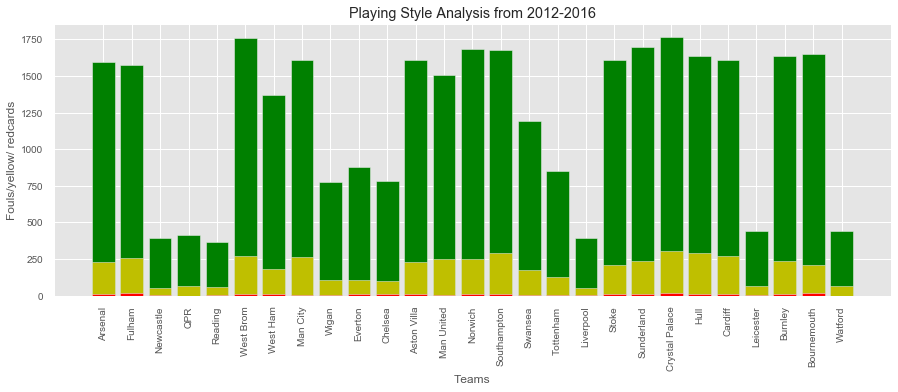

In [40]:
fig,ax=plt.subplots(figsize=(15,5))

ax.bar(names, fouls_data['Total Fouls'], width=0.8, label='F',color='g')
ax.bar(names, fouls_data['Total Yellow cards'], width=0.8, label='Y',color='y')
ax.bar(names, fouls_data['Total Red cards'], width=0.8, label='R',color='r')
ax.set_xlabel('Teams')
ax.set_ylabel('Fouls/yellow/ redcards')
ax.set_title('Playing Style Analysis from 2012-2016')
plt.xticks(rotation=90)

plt.show()


#### 4.4 Playing styles at home ground and away ground by teams

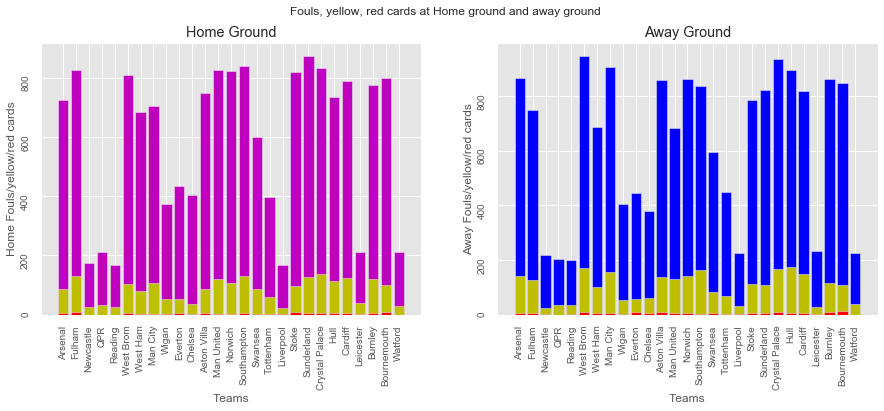

In [41]:
#Playing styles at home ground and away ground by teams

fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,figsize=(15,5))

plt.suptitle('Fouls, yellow, red cards at Home ground and away ground')


ax1.bar(names, fouls_data['HF'], width=0.8, label='HF',color='m')
ax1.bar(names, fouls_data['HY'], width=0.8, label='HY',color='y')
ax1.bar(names, fouls_data['HR'], width=0.8, label='HR',color='r')
ax1.set_xlabel('Teams')
ax1.set_ylabel('Home Fouls/yellow/red cards')
ax1.set_title('Home Ground')
ax1.tick_params(labelrotation=90)


ax2.set_title('Away Ground')
ax2.set_xlabel('Teams')
ax2.set_ylabel('Away Fouls/yellow/red cards')
ax2.bar(names, fouls_data['AF'], width=0.8, label='AF',color='b')
ax2.bar(names, fouls_data['AY'], width=0.8, label='AY',color='y')
ax2.bar(names, fouls_data['AR'], width=0.8, label='AR',color='r')
ax2.tick_params(labelrotation=90)

plt.show()


**Observation:**

     More fouls at Away ground than Home Ground for maximum number of teams